In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('whitegrid')
from datetime import datetime

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge, ElasticNetCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
crypto = pd.read_csv('Crypto1.csv')
crypto['Date']=pd.to_datetime(crypto['Date'], format="%Y/%m/%d")

In [4]:
crypto_all = crypto.copy()

NameError: name 'crypto' is not defined

In [399]:
crypto['Date'] = pd.to_datetime(crypto['Date'])
crypto = crypto.set_index('Date')

In [1]:
crypto.tail(2)

NameError: name 'crypto' is not defined

In [352]:
crypto.isnull().sum()

Unnamed: 0        0
Bitcoin_price     0
Ethereum_price    0
Cardano_price     0
Ripple_price      0
S&P500            0
DJI               0
NASDAQ            0
Gold              0
Silver            0
Commodities       0
T_Bill            0
Oil               0
Twitter_volume    0
Google_trends     5
dtype: int64

In [353]:
## only 5 missing values, these will be removed as they should not impact the data too much
crypto = crypto.dropna()

In [354]:
crypto.tail()

,Unnamed: 0,Bitcoin_price,Ethereum_price,Cardano_price,Ripple_price,S&P500,DJI,NASDAQ,Gold,Silver,Commodities,T_Bill,Oil,Twitter_volume,Google_trends
Date,,,,,,,,,,,,,,,
2021-02-17,2656,52165.302555,1835.991463,0.884654,0.539832,3931.330078,31613.019531,13965.490234,166.330002,25.400000,14.17,1.301,61.139999,0.0,72.0
2021-02-18,2657,51728.508797,1936.715286,0.910121,0.535741,3913.969971,31493.339844,13865.360352,166.320007,25.059999,14.09,1.287,60.520000,0.0,72.0
2021-02-19,2658,55719.204362,1958.739190,0.934633,0.564024,3906.709961,31494.320313,13874.459961,167.009995,25.260000,14.04,1.345,59.240002,0.0,72.0
2021-02-20,2659,54801.648644,1855.264841,1.091894,0.490166,3906.709961,31494.320313,13874.459961,167.009995,25.260000,14.04,1.345,59.240002,0.0,72.0
2021-02-21,2660,57128.642606,1913.800284,1.084463,0.534231,3906.709961,31494.320313,13874.459961,167.009995,25.260000,14.04,1.345,59.240002,0.0,72.0


In [393]:
crypto= crypto.drop(['Unnamed: 0'],axis=1)

In [394]:
crypto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            2666 non-null   datetime64[ns]
 1   Bitcoin_price   2666 non-null   float64       
 2   Ethereum_price  2666 non-null   float64       
 3   Cardano_price   2666 non-null   float64       
 4   Ripple_price    2666 non-null   float64       
 5   S&P500          2666 non-null   float64       
 6   DJI             2666 non-null   float64       
 7   NASDAQ          2666 non-null   float64       
 8   Gold            2666 non-null   float64       
 9   Silver          2666 non-null   float64       
 10  Commodities     2666 non-null   float64       
 11  T_Bill          2666 non-null   float64       
 12  Oil             2666 non-null   float64       
 13  Twitter_volume  2666 non-null   float64       
 14  Google_trends   2661 non-null   float64       
dtypes: d

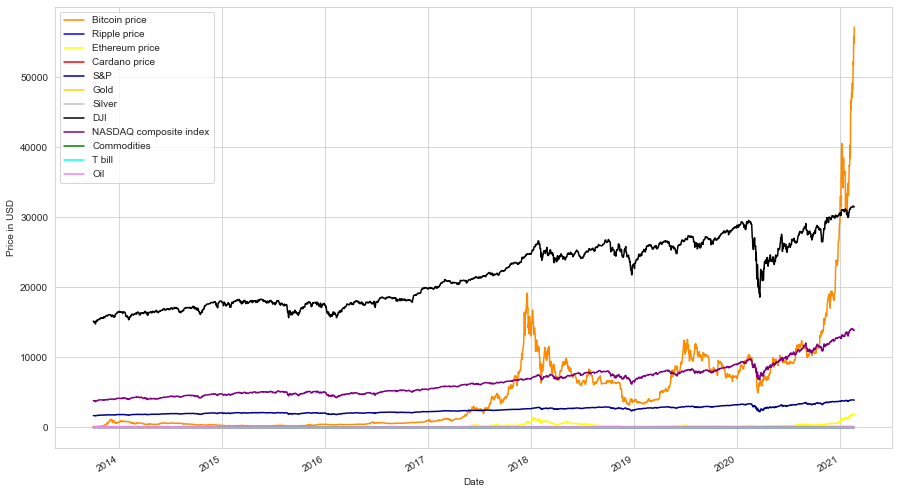

In [357]:
plt.figure(figsize=(15,9))

(crypto['Bitcoin_price']).plot(color='darkorange', label='Bitcoin price')
(crypto['Ripple_price']).plot(color='blue', label='Ripple price')
(crypto['Ethereum_price']).plot(color='yellow', label='Ethereum price')
(crypto['Cardano_price']).plot(color='red', label='Cardano price')
(crypto['S&P500']).plot(color='darkblue', label='S&P')
(crypto['Gold']).plot(color='gold', label='Gold')
(crypto['Silver']).plot(color='silver', label='Silver')
(crypto['DJI']).plot(color='black', label='DJI')
(crypto['NASDAQ']).plot(color='purple', label='NASDAQ composite index')
(crypto['Commodities']).plot(color='green', label='Commodities')
(crypto['T_Bill']).plot(color='aqua', label='T bill')
(crypto['Oil']).plot(color='violet', label='Oil')


plt.ylabel('Price in USD')
plt.legend()
plt.xlabel('Date')
plt.show()

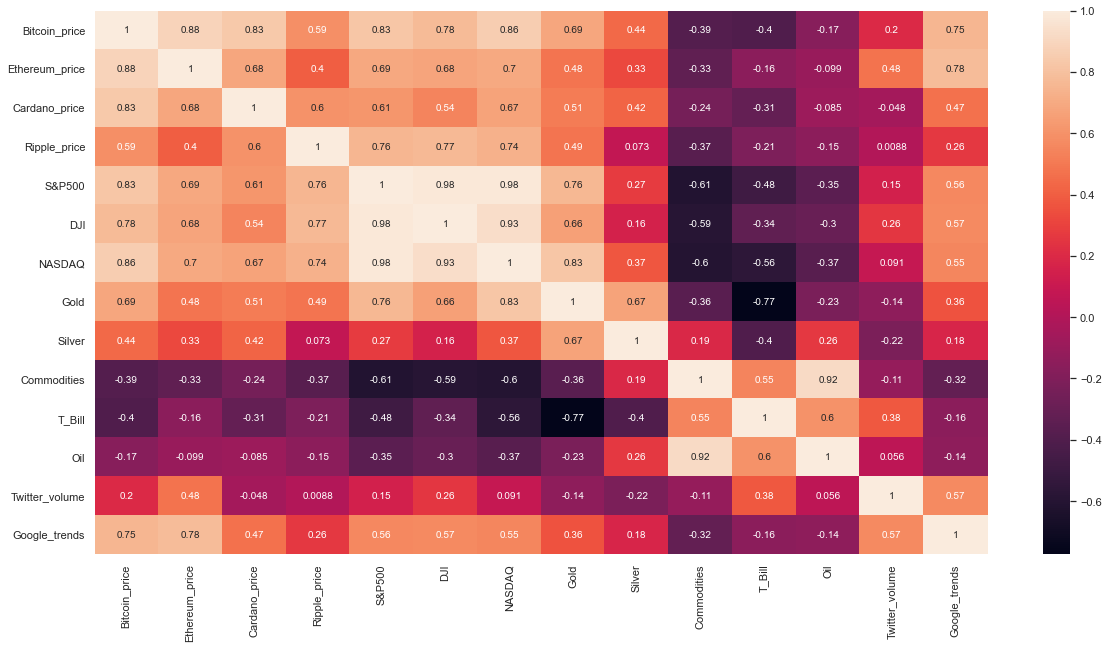

In [468]:
plt.figure(figsize =(20,10))
correlation = crypto.corr()
sns.heatmap(correlation, annot=True)

There is a positive correlation between bitcoin and other cryptocurrencies.

## Google interest

[Text(0, 0.5, 'Google Search'),
 Text(0.5, 0, 'Bitcoin Price'),
 Text(0.5, 1.0, 'Bitcoin Price vs. Google Search Interest')]

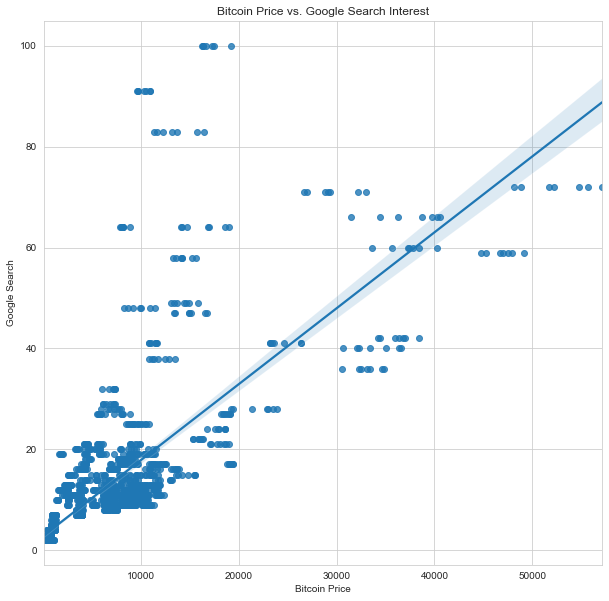

In [358]:
plt.figure(figsize=(10,10))
x = crypto['Bitcoin_price']
y = crypto['Google_trends']

ax = sns.regplot(x,y, data=crypto)
ax.set(xlabel='Bitcoin Price', ylabel='Google Search', title = 'Bitcoin Price vs. Google Search Interest')

There is an obvious trend with the increase of bitcoin, there is an increased Google interest.

In [158]:

crypto_hist = crypto.copy()
crypto_hist.fillna(crypto_hist.mean(), inplace=True)
### cypto_hist is all filled in- no n/a values

Text(0.5, 0, 'Date')

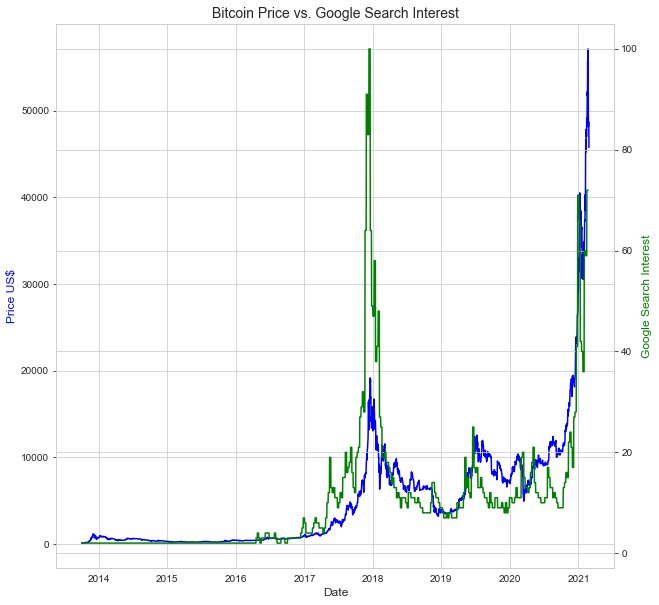

In [359]:
plt.figure(figsize=(10,10))
y1 = pd.Series(crypto_all['Bitcoin_price'])
y2 = pd.Series(crypto_all['Google_trends'])
x = pd.Series(crypto_all.Date.values)

#fig, _ = plt.subplots()

ax = plt.gca()
ax2 = ax.twinx()

ax.plot(x,y1,'b')
ax2.plot(x,y2,'g')
ax.set_ylabel("Price US$",color='b',fontsize=12)
ax2.set_ylabel("Google Search Interest",color='g',fontsize=12)
ax.grid(True)
plt.title("Bitcoin Price vs. Google Search Interest", fontsize=14)
ax.set_xlabel('Date', fontsize=12)

We can see that there is an increased interest in bitcoin when the prices show to increase.

# Bitcoin and twitter volume

[Text(0, 0.5, 'Twitter volume'),
 Text(0.5, 0, 'Bitcoin Price'),
 Text(0.5, 1.0, 'Bitcoin Price vs. Twitter volume')]

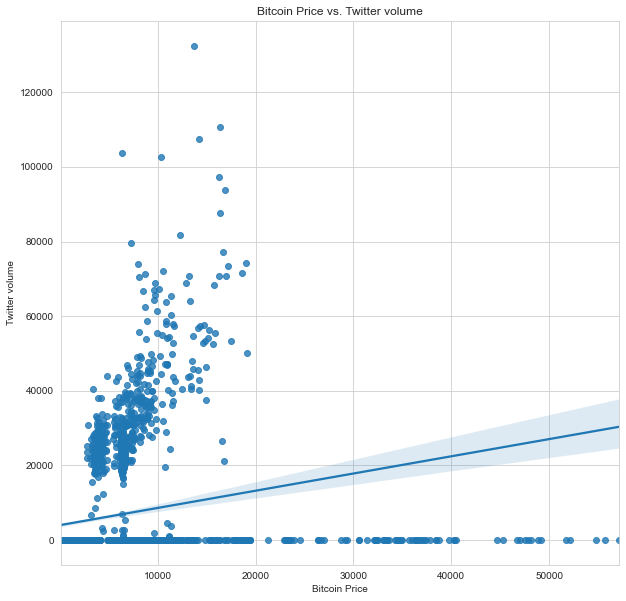

In [360]:
plt.figure(figsize=(10,10))
x = crypto['Bitcoin_price']
y = crypto['Twitter_volume']

ax = sns.regplot(x,y, data=crypto)
ax.set(xlabel='Bitcoin Price', ylabel='Twitter volume', title = 'Bitcoin Price vs. Twitter volume')

Text(0.5, 0, 'Date')

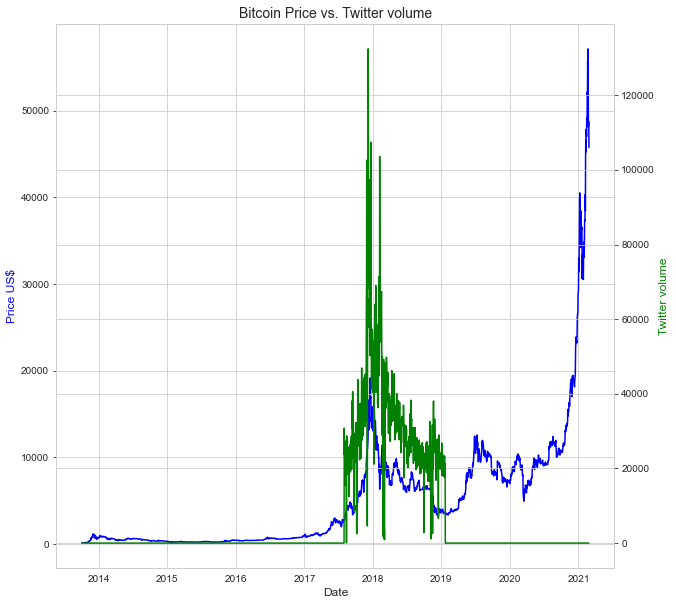

In [361]:
plt.figure(figsize=(10,10))
y1 = pd.Series(crypto_all['Bitcoin_price'])
y2 = pd.Series(crypto_all['Twitter_volume'])
x = pd.Series(crypto_all.Date.values)

#fig, _ = plt.subplots()

ax = plt.gca()
ax2 = ax.twinx()

ax.plot(x,y1,'b')
ax2.plot(x,y2,'g')
ax.set_ylabel("Price US$",color='b',fontsize=12)
ax2.set_ylabel("Twitter volume",color='g',fontsize=12)
ax.grid(True)
plt.title("Bitcoin Price vs. Twitter volume", fontsize=14)
ax.set_xlabel('Date', fontsize=12)

## Bitcoin and NASDAQ

[Text(0, 0.5, 'Nasdaq Composite Index'),
 Text(0.5, 0, 'Bitcoin Price'),
 Text(0.5, 1.0, 'Bitcoin Price vs. Nasdaq')]

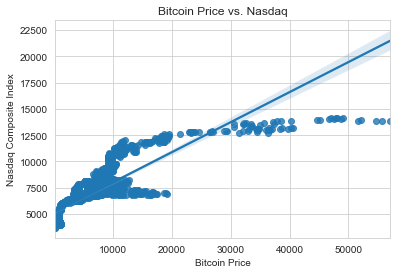

In [362]:
x = crypto['Bitcoin_price']
y = crypto['NASDAQ']
ax = sns.regplot(x,y, data=crypto)
ax.set(xlabel='Bitcoin Price', ylabel='Nasdaq Composite Index', title = 'Bitcoin Price vs. Nasdaq')

Text(0.5, 0, 'Date')

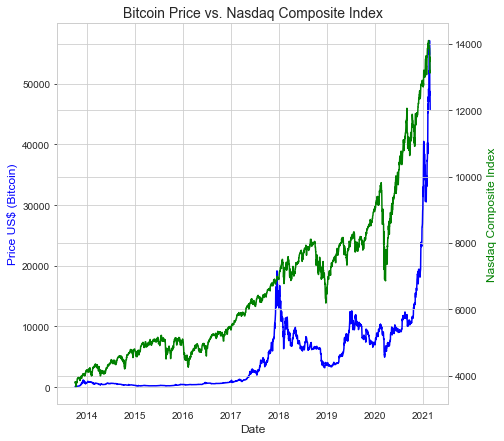

In [363]:
plt.figure(figsize=(7,7))
y1 = pd.Series(crypto_all['Bitcoin_price'])
y2 = pd.Series(crypto_all['NASDAQ'])
x = pd.Series(crypto_all.Date.values)

#fig, _ = plt.subplots()

ax = plt.gca()
ax2 = ax.twinx()

ax.plot(x,y1,'b')
ax2.plot(x,y2,'g')
ax.set_ylabel("Price US$ (Bitcoin)",color='b',fontsize=12)
ax2.set_ylabel("Nasdaq Composite Index",color='g',fontsize=12)
ax.grid(True)
plt.title("Bitcoin Price vs. Nasdaq Composite Index", fontsize=14)
ax.set_xlabel('Date', fontsize=12)

## Bitcoin and Transaction fees

[Text(0, 0.5, ' Transaction Fees'),
 Text(0.5, 0, 'Bitcoin Price'),
 Text(0.5, 1.0, 'Bitcoin Price vs. Network Transaction Fees')]

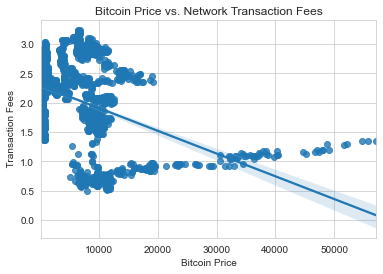

In [364]:
x = crypto_hist['Bitcoin_price']
y = crypto_hist['T_Bill']

ax = sns.regplot(x,y, data=crypto_hist)
ax.set(xlabel='Bitcoin Price', ylabel=' Transaction Fees', title = 'Bitcoin Price vs. Network Transaction Fees')

Text(0.5, 0, 'Date')

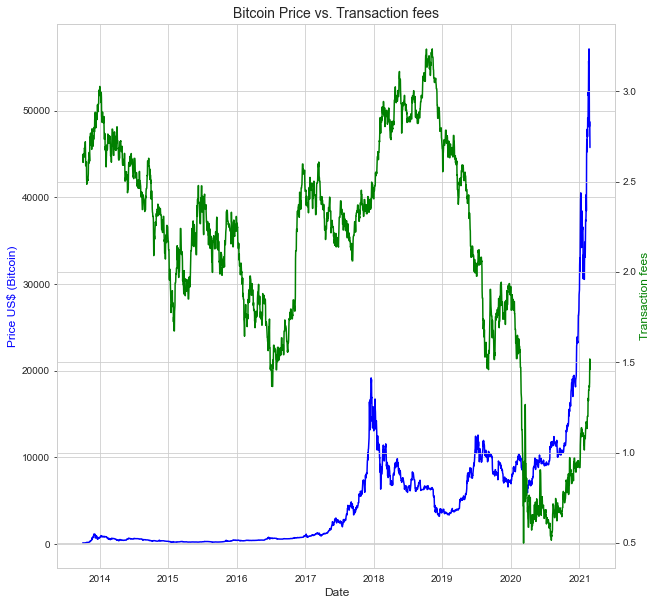

In [365]:
plt.figure(figsize=(10,10))
y1 = pd.Series(crypto_all['Bitcoin_price'])
y2 = pd.Series(crypto_all['T_Bill'])
x = pd.Series(crypto_all.Date.values)

#fig, _ = plt.subplots()

ax = plt.gca()
ax2 = ax.twinx()

ax.plot(x,y1,'b')
ax2.plot(x,y2,'g')
ax.set_ylabel("Price US$ (Bitcoin)",color='b',fontsize=12)
ax2.set_ylabel("Transaction fees",color='g',fontsize=12)
ax.grid(True)
plt.title("Bitcoin Price vs. Transaction fees", fontsize=14)
ax.set_xlabel('Date', fontsize=12)

# Moving average

In [535]:
crypto.head(2)

,Bitcoin_price,Ethereum_price,Cardano_price,Ripple_price,S&P500,DJI,NASDAQ,Gold,Silver,Commodities,T_Bill,Oil,Twitter_volume,Google_trends
Date,,,,,,,,,,,,,,
2013-10-01,123.65499,0.0,0.0,0.0,1695.000000,15191.700195,3817.97998,124.589996,20.41,31.879999,2.646,102.040001,0.0,2.0
2013-10-02,125.45500,0.0,0.0,0.0,1693.869995,15133.139648,3815.02002,127.059998,20.92,32.360001,2.626,104.099998,0.0,2.0


In [524]:
btc= crypto[['Bitcoin_price']]
crypto.colums=['Bitcoin_price']
btc_ma = btc.rolling(window=15).mean()

eth = crypto[['Ethereum_price']]
crypto.colums=['Ethereum_price']
eth_ma = eth.rolling(window=15).mean()

car = crypto[['Cardano_price']]
crypto.colums=['Cardano_price']
car_ma = car.rolling(window=15).mean()

rip = crypto[['Ripple_price']]
crypto.colums=['Ripple_price']
rip_ma = eth.rolling(window=15).mean()

end = pd.concat([btc,eth,car,rip],axis=1)
end_ma = pd.concat([btc_ma,eth_ma,car_ma,rip_ma],axis=1)
end_ma.tail()

,Bitcoin_price,Ethereum_price,Cardano_price,Ethereum_price
Date,,,,
2021-02-22,50057.471983,1821.642917,0.909067,1821.642917
2021-02-23,50287.884783,1810.426044,0.925479,1810.426044
2021-02-24,50425.923536,1798.892611,0.947448,1798.892611
2021-02-25,50629.519296,1784.024803,0.962254,1784.024803
2021-02-26,50512.933789,1760.967449,0.978754,1760.967449


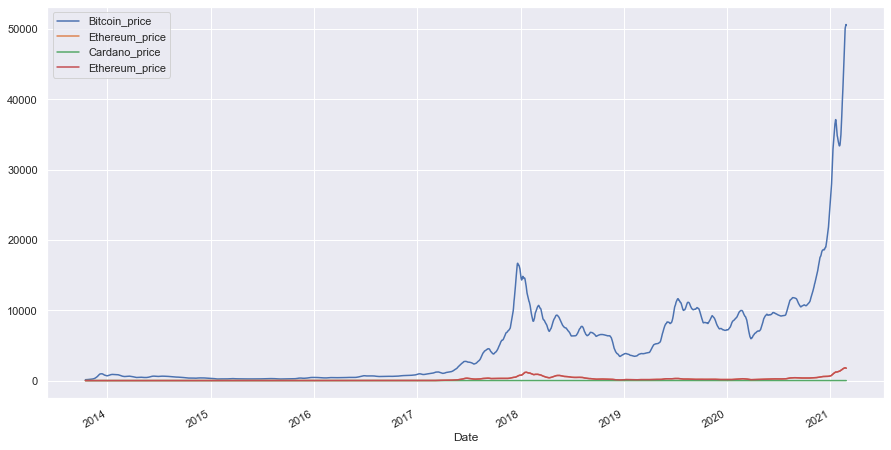

In [525]:
end_ma.plot(figsize=(15,8))

From the moving average plot, we can see that the price of bitcoin fluctuates more when compare to the other cryptocurrencies.

## Building a model

In [370]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [64]:
crypto.head(2)

,Date,Bitcoin_price,Ethereum_price,Cardano_price,Ripple_price,S&P500,DJI,NASDAQ,Gold,Silver,Commodities,T_Bill,Oil,Twitter_volume,Google_trends
0,2013-10-01,123.65499,0.0,0.0,0.0,1695.000000,15191.700195,3817.97998,124.589996,20.41,31.879999,2.646,102.040001,0.0,2.0
1,2013-10-02,125.45500,0.0,0.0,0.0,1693.869995,15133.139648,3815.02002,127.059998,20.92,32.360001,2.626,104.099998,0.0,2.0


In [371]:
import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()

In [372]:
X = crypto_hist[['Ethereum_price','Cardano_price','Ripple_price','S&P500','DJI','NASDAQ','Gold','Silver','Google_trends']]
y = crypto_hist[['Bitcoin_price']]

In [164]:
model.fit(X,y)

LinearRegression()

In [165]:
y_pred = model.predict(X)

In [166]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

Mean Absolute Error: 949.5468297312773
Mean Squared Error: 2119141.679982161
Root Mean Squared Error: 1455.7271997122816


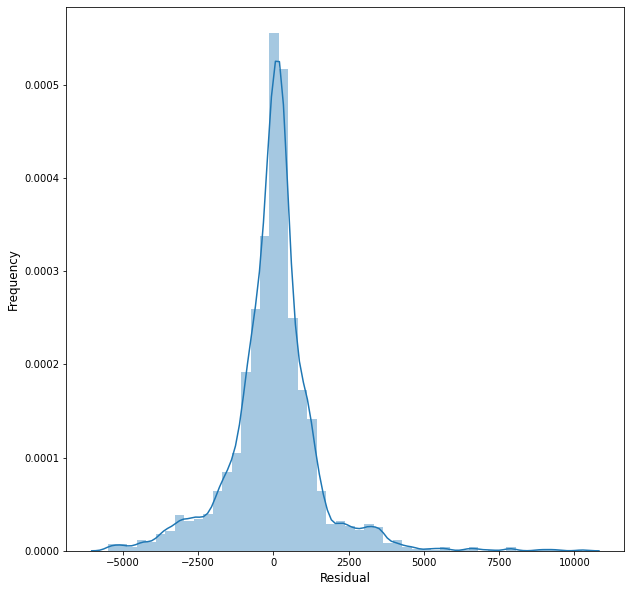

In [167]:
plt.figure(figsize=(10,10))
y_pred = model.predict(X)

residuals = y - y_pred

sns.distplot(residuals);
plt.ylabel("Frequency",fontsize=12)
plt.xlabel("Residual",fontsize=12)
plt.show()

## Cross validation

In [168]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.3)

# Fit the model against the training data
model.fit(X_train, y_train)
# # Evaluate the model against the testing data
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9565563393498269
0.9522146022425426


The model using linear regression method gives us a rough idea on model performance and will be used to compare more complex methods. The RMSE value on the training set is 1456 is good and can be said it fits the training data quite well with the normal distribution.
Cross validation shows that the model performs well with a score of 95% on the test set.

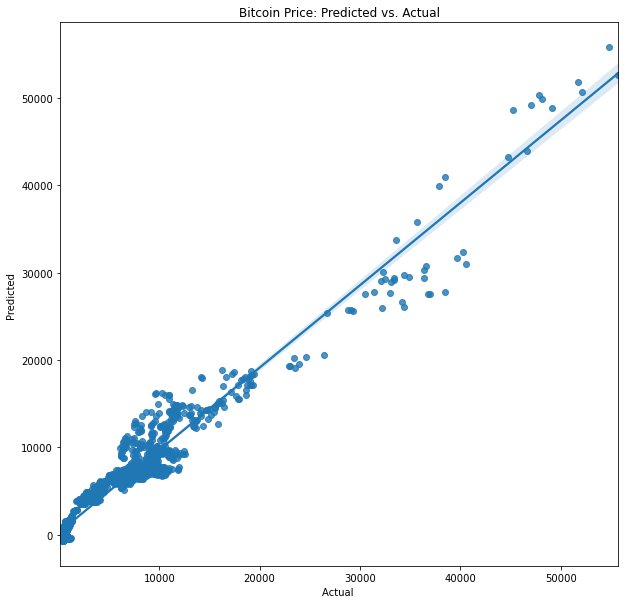

In [169]:
plt.figure(figsize=(10,10))
ax = sns.regplot(x=y_test,y=model.predict(X_test), data=crypto_hist)
ax.set(xlabel='Actual ', ylabel='Predicted ', title = 'Bitcoin Price: Predicted vs. Actual')
plt.show()

## More complex models

We will attempt to build more complex models here which may be used to predict bitcoin prices

In [170]:
def regression(X_train, X_test, y_train, y_test):
    Regressor = {
        'Random Forest Regressor': RandomForestRegressor(n_estimators=200),
        'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=500),
        'ExtraTrees Regressor': ExtraTreesRegressor(n_estimators=500, min_samples_split=3),
        'Bayesian Ridge': BayesianRidge(),
       
    }

    for name, clf in Regressor.items():
        print(name)
        clf.fit(X_train, y_train)
    
        print(f'R2: {r2_score(y_test, clf.predict(X_test)):.2f}')
        print(f'MAE: {mean_absolute_error(y_test, clf.predict(X_test)):.2f}')
        print(f'MSE: {mean_squared_error(y_test, clf.predict(X_test)):.2f}')
        print()

In [171]:
print('Model:')
regression(X_train, X_test, y_train, y_test)

Model:
Random Forest Regressor


<ipython-input-170-acb885619054>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


R2: 0.99
MAE: 256.57
MSE: 356542.37

Gradient Boosting Regressor


/Users/Evelyn/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


R2: 0.99
MAE: 300.29
MSE: 451362.60

ExtraTrees Regressor


<ipython-input-170-acb885619054>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


R2: 1.00
MAE: 188.09
MSE: 230004.06

Bayesian Ridge
R2: 0.95
MAE: 965.08
MSE: 2263812.50



/Users/Evelyn/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


The models score very well and could be concluded to predict perfectly. However, the models most likely overfit to the data resulting in such a high score.

### Lin reg with split

In [172]:
X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

In [173]:
from sklearn import linear_model
clf = linear_model.LinearRegression() 
reg = clf.fit(X_train, y_train)

In [174]:
cross_validation = clf.predict(X_test)

In [175]:
confidence = clf.score(X_test, y_test)
print("confidence: ", confidence)

confidence:  0.9479402578867547


In [176]:
scores =  cross_val_score(clf, X_train, y_train,cv=5)
print("R-squared score for training",scores.mean())

R-squared score for training 0.9533795182474479


In [177]:
pred_reg = reg.predict(X_test)
scores = cross_val_score(reg, y_test,pred_reg,cv=5)
print("R-squared score for testing", scores.mean())

R-squared score for testing 0.944474874710032


Splitting the data may allow for a more accurate prediction as it does not overfit to the data. This may be seen with the decrease in score of 94%. However we may still conclude this is still ovefitting. Cross validation could be used here to validate the fit however, using an ARIMA method may be more suitable.

## Building a time series

In [412]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import datetime as dt
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime, timedelta, date

In [402]:
Time = crypto_all[['Date','Bitcoin_price']]

In [403]:
Time.tail(2)

,Date,Bitcoin_price
2664,2021-02-25,48291.412083
2665,2021-02-26,45752.114919


In [ ]:
Time['Date'] = pd.to_datetime(Time['Date'])
Time = Time.set_index('Date')

In [405]:
Time.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2666 entries, 2013-10-01 to 2021-02-26
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Bitcoin_price  2666 non-null   float64
dtypes: float64(1)
memory usage: 41.7 KB


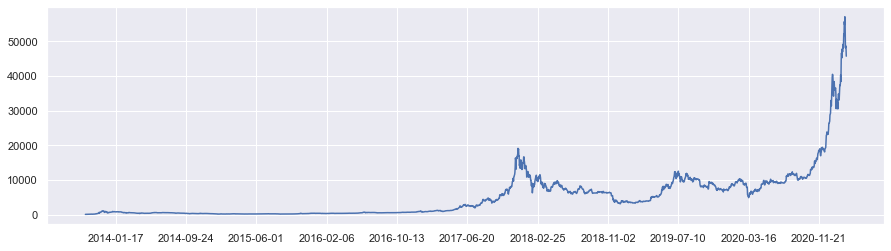

In [458]:
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(111)
lines = ax.plot(Time.Bitcoin_price)
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
plt.show()

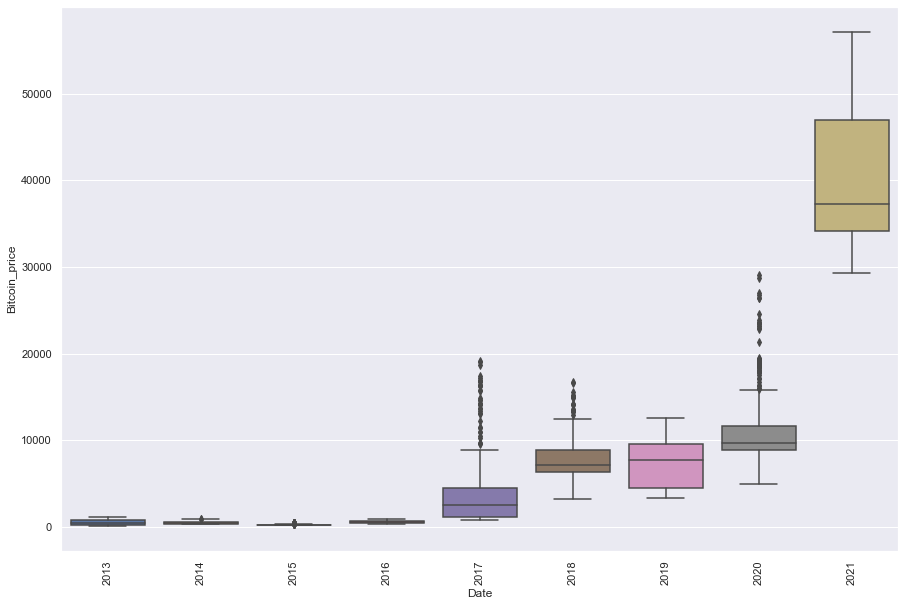

In [495]:
Time['Date'] = pd.DatetimeIndex(Time.index).year

fig, axes = plt.subplots(figsize=(15, 10))
ax = sns.boxplot(data = Time, x='Date',y=('Bitcoin_price'))
for item in ax.get_xticklabels():
    item.set_rotation(90)
plt.show()

Time1 = Time.drop(['Date'], axis = 1)

The price of bitcoin sky rocketed in 2021 as seen in the boxplot.

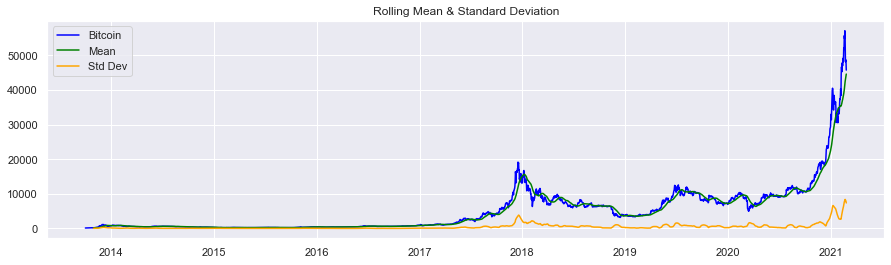

(4.378527456677481, 1.0, 26, 2639, {'1%': -3.432830360798943, '5%': -2.8626358355986774, '10%': -2.5673533514279425}, 39189.54595874378)
ADF Stat: 4.378527
P-value: 1.000000
1% -3.432830360798943 The graph is non stationary
5% -2.8626358355986774 The graph is non stationary
10% -2.5673533514279425 The graph is non stationary


In [513]:
from statsmodels.tsa.stattools import adfuller

def test_stationary(x):
    
    #Get rolling stats
    rollingmean = x.rolling(window = 30, center=False).mean()
    rollingstd = x.rolling(window = 30, center=False).std()

    
    #Plot rolling stats
    plt.figure(figsize=(15, 4))
    orig = plt.plot(x, color = 'blue', label = 'Bitcoin')
    mean = plt.plot(rollingmean, color = 'green', label = "Mean")
    std = plt.plot(rollingstd, color = 'orange', label = 'Std Dev')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block = False)
    
    #Dickey Fuller Test
    result=adfuller(x)
    print(result)
    print('ADF Stat: %F'%result[0])
    print('P-value: %F'%result[1])
    for key, value in result[4].items():
        if result[0]>value:
            print (key, value, 'The graph is non stationary')
        else:
            print(key, value, 'The graph is stationary')


data = Time[['Bitcoin_price']]
test_stationary(data)

the data is non stationary, so need to use differencing to remove the trend and seasonality. The ARIMA parameter d defines the number of differencing steps

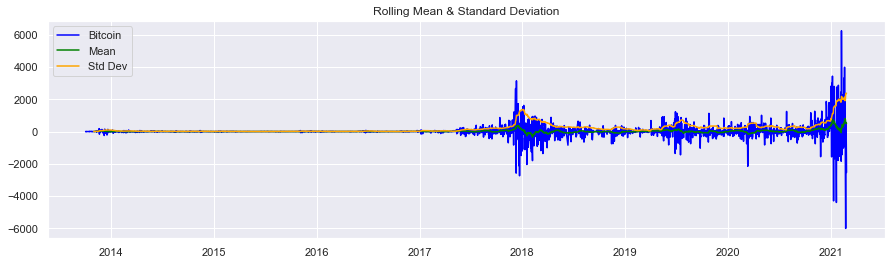

(-10.97518601581196, 7.701634719226669e-20, 28, 2636, {'1%': -3.4328331864239274, '5%': -2.8626370834536976, '10%': -2.56735401579277}, 39171.709108237555)
ADF Stat: -10.975186
P-value: 0.000000
1% -3.4328331864239274 The graph is stationary
5% -2.8626370834536976 The graph is stationary
10% -2.56735401579277 The graph is stationary


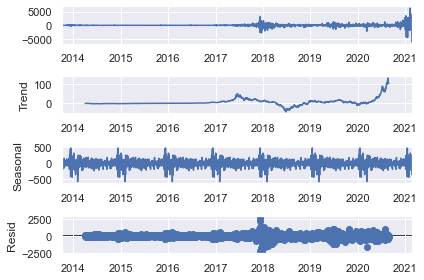

In [514]:
data_diff = data.diff()
data_diff.dropna(inplace = True)
test_stationary(data_diff)

decom_diff = seasonal_decompose(data_diff, model = 'additive', freq = 365)
decom_diff.plot()
plt.show()

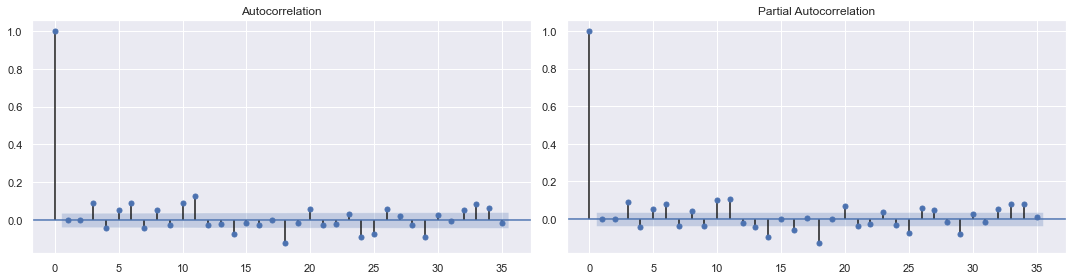

In [515]:
plt.figure(figsize=(15,4))

ax = plt.subplot(121)
plot_acf(data_diff, ax=ax)

ax = plt.subplot(122)
plot_pacf(data_diff, ax=ax)

plt.tight_layout()
plt.show()

In [527]:
data.dropna(inplace = True)
size = int(len(data)*0.2)
train, test = data[0:size], data[size:len(data)]

In [528]:
# build model
history = train.values.tolist()
predictions = list()
error_list = list()
originals = list()

model = ARIMA(history, order=(2, 2, 3))
model_fit = model.fit(disp=0)
    
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  181
Model:                 ARIMA(2, 2, 3)   Log Likelihood               -1193.543
Method:                       css-mle   S.D. of innovations            172.589
Date:                Sun, 28 Feb 2021   AIC                           2401.087
Time:                        19:40:38   BIC                           2423.476
Sample:                             2   HQIC                          2410.164
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2574      0.249      1.035      0.300      -0.230       0.745
ar.L1.D2.y    -0.2171      0.044     -4.888      0.000      -0.304      -0.130
ar.L2.D2.y    -0.9163      0.035    -26.350      0.0

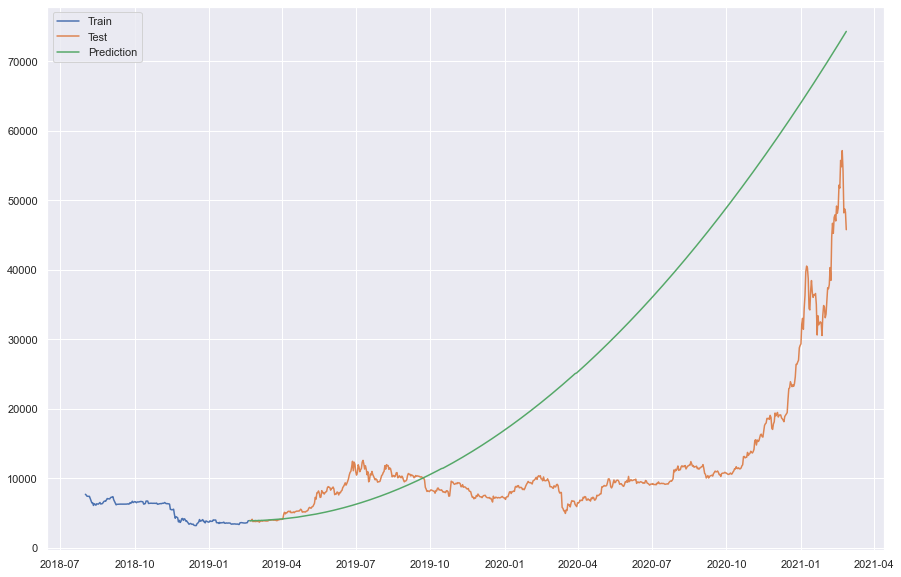

In [529]:
forecast = model_fit.forecast(steps = len(test))[0]
forecast = pd.DataFrame(forecast, index = test.index, columns = ['predictions'])

fig = plt.figure(figsize=(15, 10))
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(forecast, label = 'Prediction')
plt.legend(loc = 'upper left')
plt.show()

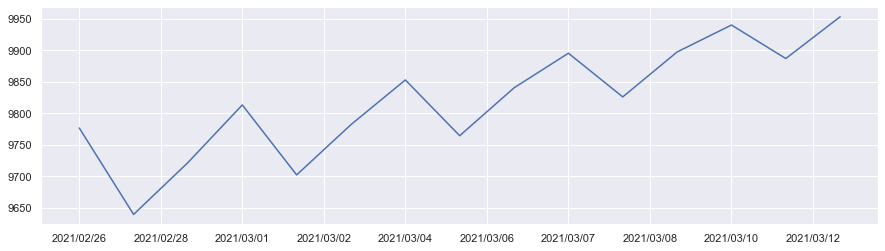

In [520]:
days = 15  #number of days from the end of the dataset to predict
dates = []

for i in range(days):
    lastdate = max(Time.index)
    newdate = lastdate + timedelta(days=i)
    newdate = datetime.strftime(newdate, "%Y/%m/%d")
    dates.append(newdate)
    i = i +1
    
forward = model_fit.forecast(days)
dct = dict(zip(dates, forward[0]))
forecast = pd.DataFrame.from_dict(dct, orient='index',columns=['Prediction'])

fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(111)
line = ax.plot(forecast)
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
plt.show()

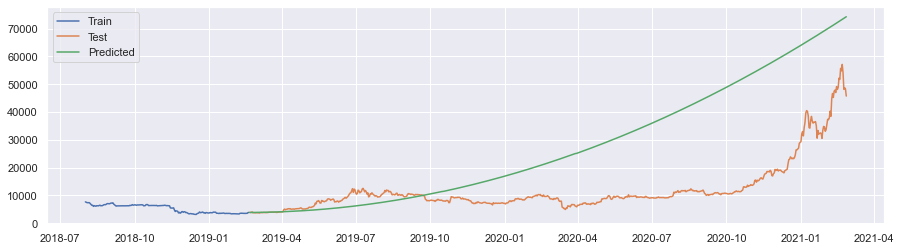

In [532]:
data = data.loc['2014-01-01':'2022-01-01']
size = int(len(data)*0.2)
train, test = data[0:size], data[size:len(data)]

# build model
history = train.values.tolist()
predictions = list()
error_list = list()
originals = list()

model = ARIMA(history, order=(2, 2, 3))
model_fit = model.fit()

forecast = model_fit.forecast(steps = len(test))[0]
forecast = pd.DataFrame(forecast, index = test.index, columns = ['predictions'])

fig = plt.figure(figsize=(15, 4))
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(forecast, label = 'Predicted')
plt.legend()
plt.show()

Because of the volatility of bitcoin and 